In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm # 폰트 설정
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp # 음수 설정
mlp.rcParams["axes.unicode_minus"] = False

In [39]:
EVcar = pd.read_csv("C:/GitLabortary/AcornBigDataClass_Team3/data/Intro/한국전력공사_지역별 전기차 현황정보_20220429.csv")
EVcar.head
# EVcar.info()

<bound method NDFrame.head of            기준일     서울     인천     경기    강원    충북     충남    대전    세종     경북  \
0   2022-03-01  43206  14134  45891  8652  9683  11532  8595  2069  12318   
1   2022-02-01  41693  13179  41266  8179  8664  10525  7902  1902  11540   
2   2022-01-01  41140  12942  40239  8042  8184  10015  7675  1879  11269   
3   2021-12-01  40564  12820  39958  7946  8194   9991  7701  1859  11240   
4   2021-11-01  38840  11775  38563  7231  7731   9836  7737  1717  10870   
5   2021-10-01  35067  11295  37084  6786  7362   9480  7700  1680  10373   
6   2021-09-01  33434  10543  35385  6266  6801   8847  7134  1627  10013   
7   2021-08-01  31220   9370  33832  5929  6414   8426  6652  1509   9683   
8   2021-07-01  29325   8446  31820  5485  5934   8042  6143  1437   9171   
9   2021-06-01  28752   7790  30030  5200  5480   7254  5836  1404   8676   
10  2021-05-01  27013   6708  26944  4750  4952   6588  5222  1353   8118   
11  2021-04-01  25581   6312  24841  4460  478

In [40]:
EVcar = EVcar.drop([37,36,35,34,33,31,32,31,30,29,28,26,25,24,23,22,21,20,19,18,17,16,14,13,11,12,10,9,8,7,6,5,4,2,1,0], axis = 0)
EVcar = EVcar.drop(["서울","인천","경기","강원","충북","충남","대전","세종","경북","대구","전북","전남",
                   "광주","경남","부산","울산","제주"], axis=1)
EVcar = EVcar.sort_values(by="합계",ascending=True, axis=0)
EVcar = EVcar.set_index(["기준일"])
EVcar.rename(index={"2019-12-01":"2019","2020-12-01":"2020","2021-12-01":"2021"}, inplace=True)
EVcar

,합계
기준일,
2019,89918
2020,134962
2021,231443


<AxesSubplot:xlabel='기준일'>

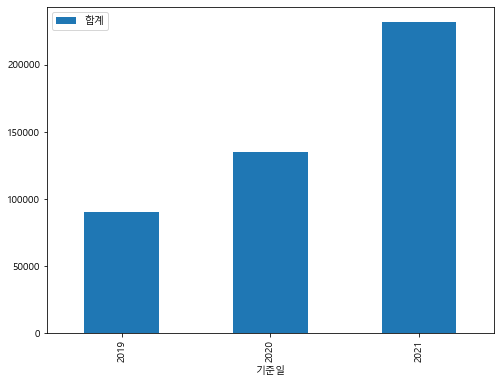

In [4]:
EVcar.plot(kind="bar",figsize=(8,6))

In [5]:
EVcharge1 = pd.read_csv("C:/GitLabortary/AcornBigDataClass_Team3/data/Intro/환경부_전기자동차 급속충전기 보급 현황_20211231.csv")
del EVcharge1["설명"]
EVcharge1.head()
# EVcharge1.info()

,년도,급속충전기 보급 수량
0,2016,943
1,2017,2441
2,2018,3317
3,2019,1208
4,2020,2521


In [6]:
EVcharge2 = pd.read_csv("C:/GitLabortary/AcornBigDataClass_Team3/data/Intro/환경부_전기자동차 완속충전기 보급 현황_20211231.csv")
del EVcharge2["설명"]
EVcharge2.rename(columns={'완속충전기 보급수량(단위-기)':'완속충전기 보급수량'}, inplace=True)
EVcharge2.head()

,년도,완속충전기 보급수량
0,2016,828
1,2017,8684
2,2018,16662
3,2019,21008
4,2020,17499


In [7]:
EVcharge = pd.merge(EVcharge1, EVcharge2, on="년도")
EVcharge.head()

,년도,급속충전기 보급 수량,완속충전기 보급수량
0,2016,943,828
1,2017,2441,8684
2,2018,3317,16662
3,2019,1208,21008
4,2020,2521,17499


In [8]:
EVcharge["충전기 보급수량"] = 0
EVcharge["충전기 보급수량"][0] = (EVcharge["급속충전기 보급 수량"][0] + EVcharge["완속충전기 보급수량"][0])
EVcharge["충전기 보급수량"][1] = (EVcharge["충전기 보급수량"][0] + EVcharge["급속충전기 보급 수량"][1] + EVcharge["완속충전기 보급수량"][1])
EVcharge["충전기 보급수량"][2] = (EVcharge["충전기 보급수량"][1] + EVcharge["급속충전기 보급 수량"][2] + EVcharge["완속충전기 보급수량"][2])
EVcharge["충전기 보급수량"][3] = (EVcharge["충전기 보급수량"][2] + EVcharge["급속충전기 보급 수량"][3] + EVcharge["완속충전기 보급수량"][3])
EVcharge["충전기 보급수량"][4] = (EVcharge["충전기 보급수량"][3] + EVcharge["급속충전기 보급 수량"][4] + EVcharge["완속충전기 보급수량"][4])
EVcharge["충전기 보급수량"][5] = (EVcharge["충전기 보급수량"][4] + EVcharge["급속충전기 보급 수량"][5] + EVcharge["완속충전기 보급수량"][5])
EVcharge.head()

,년도,급속충전기 보급 수량,완속충전기 보급수량,충전기 보급수량
0,2016,943,828,1771
1,2017,2441,8684,12896
2,2018,3317,16662,32875
3,2019,1208,21008,55091
4,2020,2521,17499,75111


In [9]:
EVcharge = EVcharge.drop([0,1,2], axis=0)
EVcharge = EVcharge.drop(["급속충전기 보급 수량","완속충전기 보급수량"], axis=1)
EVcharge

,년도,충전기 보급수량
3,2019,55091
4,2020,75111
5,2021,107295


In [10]:
EVcharge = EVcharge.set_index(["년도"])

<AxesSubplot:xlabel='년도'>

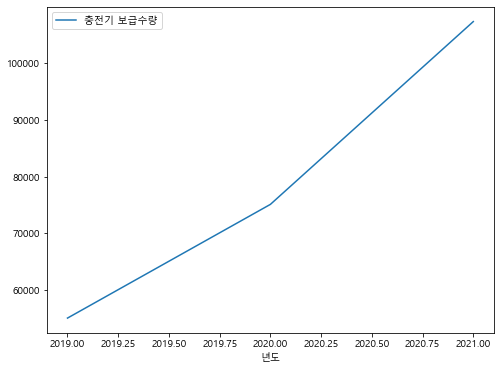

In [11]:
EVcharge.plot(figsize=(8,6))

In [12]:
# 하나로 합치기
EVcar = pd.read_csv("C:/GitLabortary/AcornBigDataClass_Team3/data/Intro/한국전력공사_지역별 전기차 현황정보_20220429.csv")

EVcar = EVcar.drop([37,36,35,34,33,31,32,31,30,29,28,26,25,24,23,22,21,20,19,18,17,16,14,13,11,12,10,9,8,7,6,5,4,2,1,0], axis = 0)
EVcar = EVcar.drop(["서울","인천","경기","강원","충북","충남","대전","세종","경북","대구","전북","전남",
                   "광주","경남","부산","울산","제주"], axis=1)
EVcar = EVcar.sort_values(by="합계",ascending=True, axis=0)
EVcar = EVcar.set_index(["기준일"])
EVcar.rename(index={"2019-12-01":"2019","2020-12-01":"2020","2021-12-01":"2021"}, inplace=True)
EVcar = EVcar.reset_index(["기준일"])
EVcar

,기준일,합계
0,2019,89918
1,2020,134962
2,2021,231443


In [13]:
EVcharge1 = pd.read_csv("C:/GitLabortary/AcornBigDataClass_Team3/data/Intro/환경부_전기자동차 급속충전기 보급 현황_20211231.csv")
del EVcharge1["설명"]
EVcharge2 = pd.read_csv("C:/GitLabortary/AcornBigDataClass_Team3/data/Intro/환경부_전기자동차 완속충전기 보급 현황_20211231.csv")
del EVcharge2["설명"]
EVcharge2.rename(columns={'완속충전기 보급수량(단위-기)':'완속충전기 보급수량'}, inplace=True)
EVcharge = pd.merge(EVcharge1, EVcharge2, on="년도")

EVcharge["충전기 보급수량"] = 0
EVcharge["충전기 보급수량"][0] = (EVcharge["급속충전기 보급 수량"][0] + EVcharge["완속충전기 보급수량"][0])
EVcharge["충전기 보급수량"][1] = (EVcharge["충전기 보급수량"][0] + EVcharge["급속충전기 보급 수량"][1] + EVcharge["완속충전기 보급수량"][1])
EVcharge["충전기 보급수량"][2] = (EVcharge["충전기 보급수량"][1] + EVcharge["급속충전기 보급 수량"][2] + EVcharge["완속충전기 보급수량"][2])
EVcharge["충전기 보급수량"][3] = (EVcharge["충전기 보급수량"][2] + EVcharge["급속충전기 보급 수량"][3] + EVcharge["완속충전기 보급수량"][3])
EVcharge["충전기 보급수량"][4] = (EVcharge["충전기 보급수량"][3] + EVcharge["급속충전기 보급 수량"][4] + EVcharge["완속충전기 보급수량"][4])
EVcharge["충전기 보급수량"][5] = (EVcharge["충전기 보급수량"][4] + EVcharge["급속충전기 보급 수량"][5] + EVcharge["완속충전기 보급수량"][5])

EVcharge = EVcharge.drop([0,1,2], axis=0)
EVcharge = EVcharge.drop(["급속충전기 보급 수량","완속충전기 보급수량"], axis=1)
EVcharge

,년도,충전기 보급수량
3,2019,55091
4,2020,75111
5,2021,107295


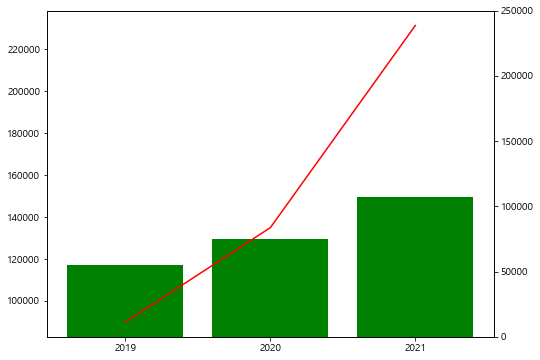

In [21]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(111)
axes2 = axes.twinx()

axes.plot(EVcar["기준일"],EVcar["합계"],color="red", label="bar")
axes2.bar(EVcar["기준일"],EVcharge["충전기 보급수량"], color="green", label="plot")
plt.ylim([0, 250000])

axes.set_zorder(axes2.get_zorder() + 10)
axes.patch.set_visible(False)

plt.show()

In [24]:
# 증가율로 변경
EVcar = pd.read_csv("C:/GitLabortary/AcornBigDataClass_Team3/data/Intro/한국전력공사_지역별 전기차 현황정보_20220429.csv")

EVcar = EVcar.drop([36,35,34,33,31,32,31,30,29,28,25,24,23,22,21,20,19,18,17,16,13,11,12,10,9,8,7,6,5,4,2,1,0], axis = 0)
EVcar = EVcar.drop(["서울","인천","경기","강원","충북","충남","대전","세종","경북","대구","전북","전남",
                   "광주","경남","부산","울산","제주"], axis=1)
EVcar = EVcar.sort_values(by="합계",ascending=True, axis=0)
EVcar = EVcar.set_index(["기준일"])
# EVcar.rename(index={"2019-12-01":"2019","2020-12-01":"2020","2021-12-01":"2021"}, inplace=True)
# EVcar = EVcar.reset_index(["기준일"])
EVcar

,합계
기준일,
2019-01-01,56085
2019-12-01,89918
2020-01-01,90701
2020-12-01,134962
2021-01-01,135391
2021-12-01,231443


In [25]:
EVcar = EVcar.T
EVcar

기준일,2019-01-01,2019-12-01,2020-01-01,2020-12-01,2021-01-01,2021-12-01
합계,56085,89918,90701,134962,135391,231443


In [26]:
EVcar["2019"] = ((EVcar["2019-12-01"] - EVcar["2019-01-01"]) / EVcar["2019-01-01"]) * 100
EVcar["2020"] = ((EVcar["2020-12-01"] - EVcar["2020-01-01"]) / EVcar["2020-01-01"]) * 100
EVcar["2021"] = ((EVcar["2021-12-01"] - EVcar["2021-01-01"]) / EVcar["2021-01-01"]) * 100

In [27]:
EVcar = EVcar.drop(["2019-01-01","2019-12-01","2020-01-01","2020-12-01","2021-01-01","2021-12-01"], axis = 1)

In [28]:
EVcar = EVcar.T

In [29]:
EVcar = EVcar.reset_index(["기준일"])
EVcar

,기준일,합계
0,2019,60.324507
1,2020,48.798800
2,2021,70.944154


In [30]:
EVcharge1 = pd.read_csv("C:/GitLabortary/AcornBigDataClass_Team3/data/Intro/환경부_전기자동차 급속충전기 보급 현황_20211231.csv")
del EVcharge1["설명"]
EVcharge2 = pd.read_csv("C:/GitLabortary/AcornBigDataClass_Team3/data/Intro/환경부_전기자동차 완속충전기 보급 현황_20211231.csv")
del EVcharge2["설명"]
EVcharge2.rename(columns={'완속충전기 보급수량(단위-기)':'완속충전기 보급수량'}, inplace=True)
EVcharge = pd.merge(EVcharge1, EVcharge2, on="년도")

EVcharge["충전기 보급수량"] = 0
EVcharge["충전기 보급수량"][0] = (EVcharge["급속충전기 보급 수량"][0] + EVcharge["완속충전기 보급수량"][0])
EVcharge["충전기 보급수량"][1] = (EVcharge["충전기 보급수량"][0] + EVcharge["급속충전기 보급 수량"][1] + EVcharge["완속충전기 보급수량"][1])
EVcharge["충전기 보급수량"][2] = (EVcharge["충전기 보급수량"][1] + EVcharge["급속충전기 보급 수량"][2] + EVcharge["완속충전기 보급수량"][2])
EVcharge["충전기 보급수량"][3] = (EVcharge["충전기 보급수량"][2] + EVcharge["급속충전기 보급 수량"][3] + EVcharge["완속충전기 보급수량"][3])
EVcharge["충전기 보급수량"][4] = (EVcharge["충전기 보급수량"][3] + EVcharge["급속충전기 보급 수량"][4] + EVcharge["완속충전기 보급수량"][4])
EVcharge["충전기 보급수량"][5] = (EVcharge["충전기 보급수량"][4] + EVcharge["급속충전기 보급 수량"][5] + EVcharge["완속충전기 보급수량"][5])

# EVcharge = EVcharge.drop([0,1,2], axis=0)
EVcharge = EVcharge.drop(["급속충전기 보급 수량","완속충전기 보급수량"], axis=1)
EVcharge = EVcharge.set_index(["년도"])
EVcharge

,충전기 보급수량
년도,
2016,1771
2017,12896
2018,32875
2019,55091
2020,75111
2021,107295


In [31]:
EVcharge=EVcharge.T
EVcharge

년도,2016,2017,2018,2019,2020,2021
충전기 보급수량,1771,12896,32875,55091,75111,107295


In [32]:
EVcharge["2019년"] = ((EVcharge[2019] - EVcharge[2018]) / EVcharge[2018]) * 100
EVcharge["2020년"] = ((EVcharge[2020] - EVcharge[2019]) / EVcharge[2019]) * 100
EVcharge["2021년"] = ((EVcharge[2021] - EVcharge[2020]) / EVcharge[2020]) * 100
EVcharge

년도,2016,2017,2018,2019,2020,2021,2019년,2020년,2021년
충전기 보급수량,1771,12896,32875,55091,75111,107295,67.577186,36.339874,42.848584


In [33]:
EVcharge = EVcharge.drop([2016,2017,2018,2019,2020,2021], axis = 1)
EVcharge

년도,2019년,2020년,2021년
충전기 보급수량,67.577186,36.339874,42.848584


In [34]:
EVcharge=EVcharge.T
EVcharge

,충전기 보급수량
년도,
2019년,67.577186
2020년,36.339874
2021년,42.848584


In [35]:
EVcharge = EVcharge.reset_index(["년도"])
EVcharge

,년도,충전기 보급수량
0,2019년,67.577186
1,2020년,36.339874
2,2021년,42.848584


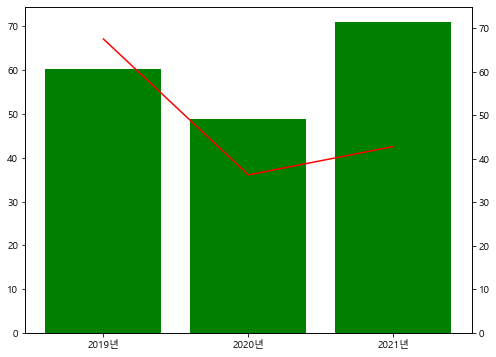

In [38]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(111)
axes2 = axes.twinx()

axes.bar(EVcharge["년도"],EVcar["합계"],color="green", label="bar")
axes2.plot(EVcharge["년도"],EVcharge["충전기 보급수량"], color="r", label="plot")
plt.ylim([0, 75])

plt.show()